In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit
import SVMs.common_SVM as common_SVM

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_SVM_DATA"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "SVM"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

In [2]:
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]


In [3]:
import TrainingCurves

default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")


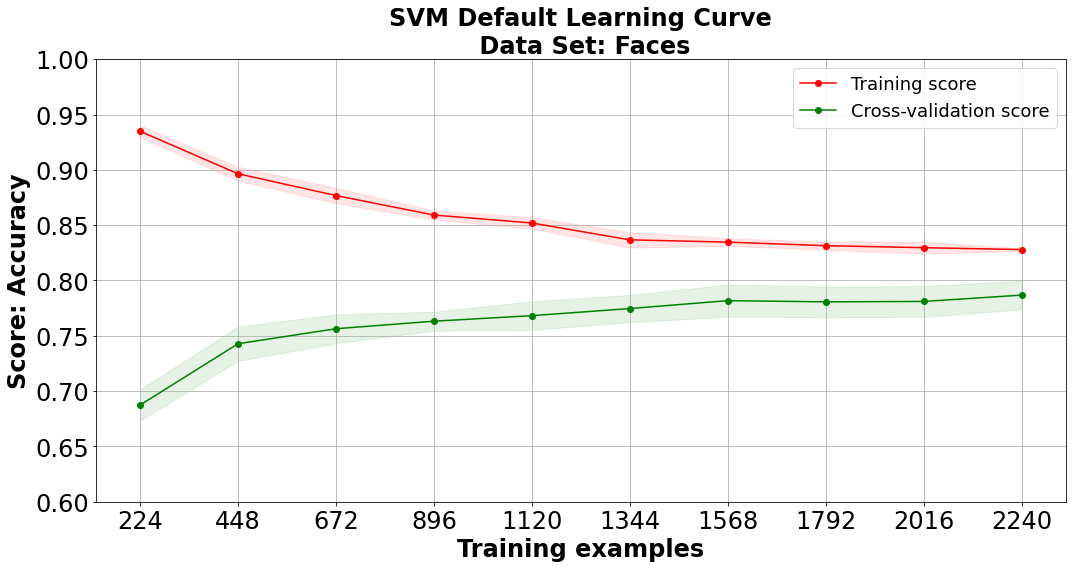

In [4]:
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(svm.SVC(kernel='linear'), X_train, y_train, "accuracy")
learning_ylim=[0.6, 1.0]
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=learning_ylim)

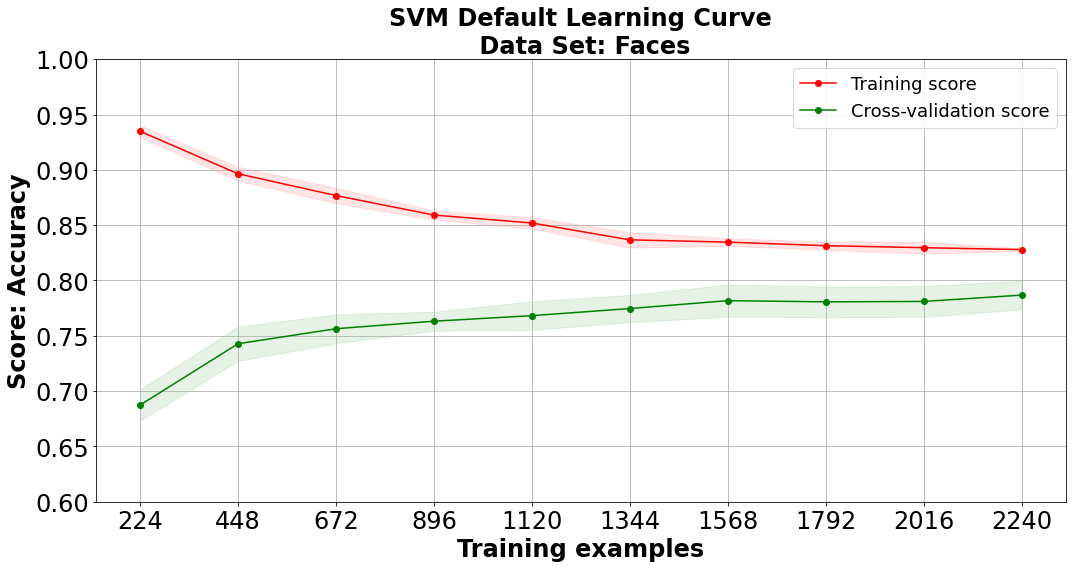

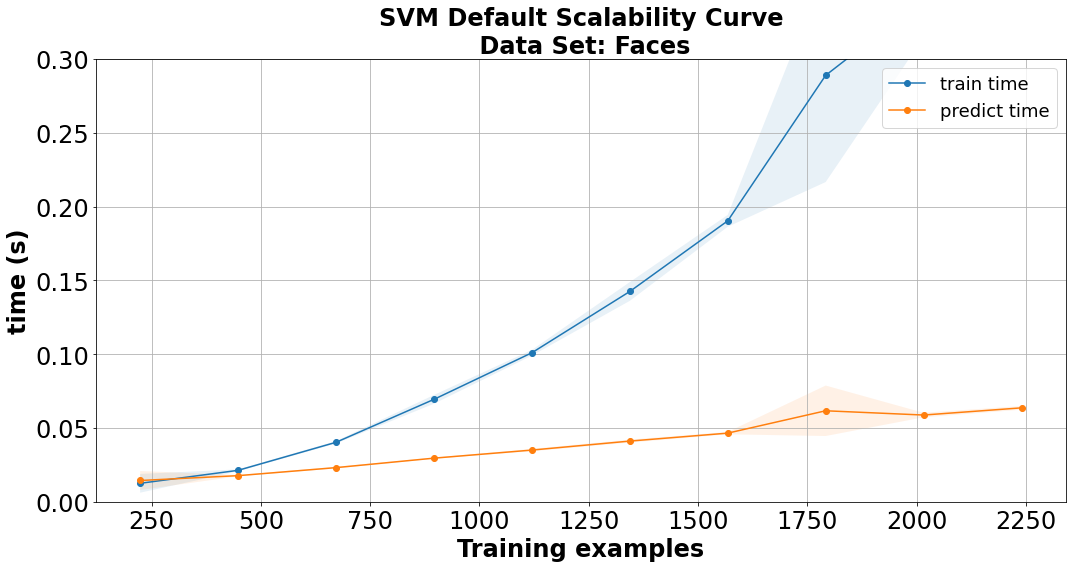

In [5]:
learning_ylim=[0.6, 1.0]
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=learning_ylim)
time_ylim=[0, 0.3]
TrainingCurves.plot_scalability_curve(default_fit_times, default_score_times, default_train_sizes, default_title.replace("Learning", "Scalability"), ylim=time_ylim)

In [6]:
C = [i for i in np.arange(0.1, 5, 0.1)]
gamma = [i for i in np.arange(0.01, .75, .01)]
kernel = ["linear", "rbf", "poly"]


In [7]:
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


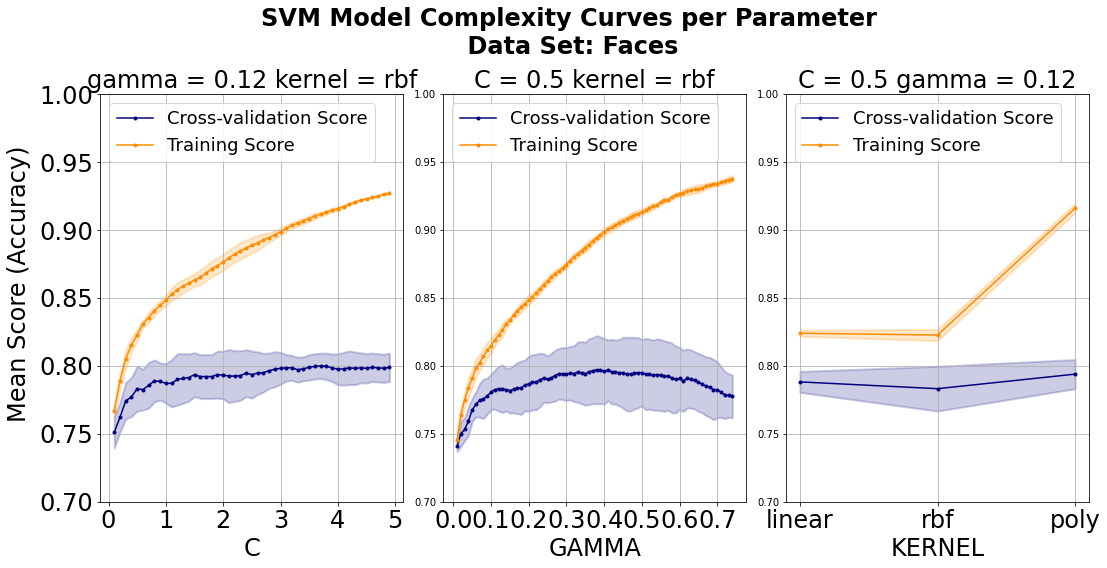

In [8]:
unused_params_values = {'gamma': min(gamma), 'C': min(C), 'kernel': 'linear'}
unused_params_values = {'kernel': 'rbf', 'gamma':0.12, 'C':0.5}
ylim=[0.7, 1.0]
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, ylim=ylim)

Plot saved as:  Figures/Faces_SVM_GS_Times_C_gamma_kernel.png


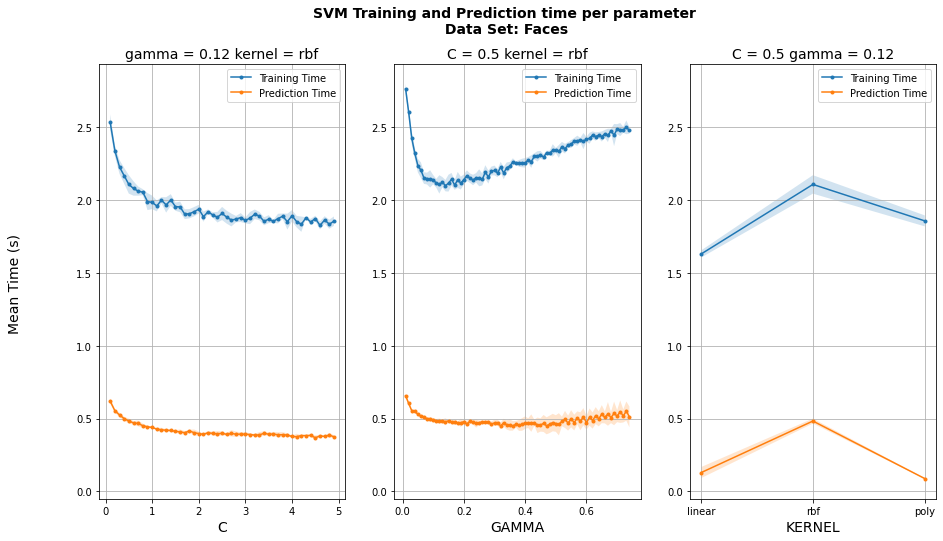

In [9]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


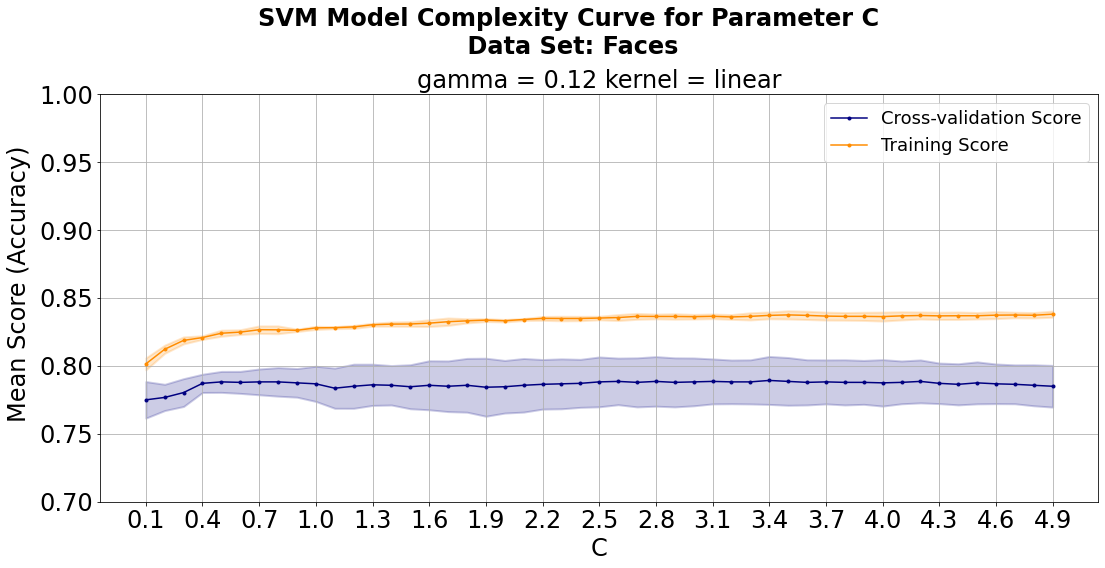

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


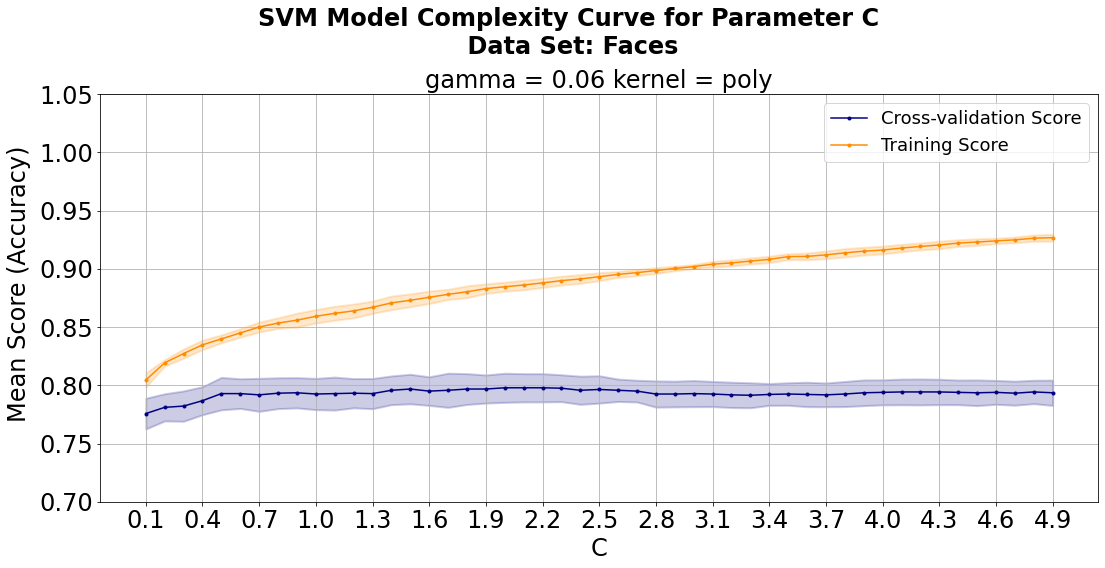

Plot saved as:  Figures/Faces_SVM_GS_ModelComplexity_C_gamma_kernel.png


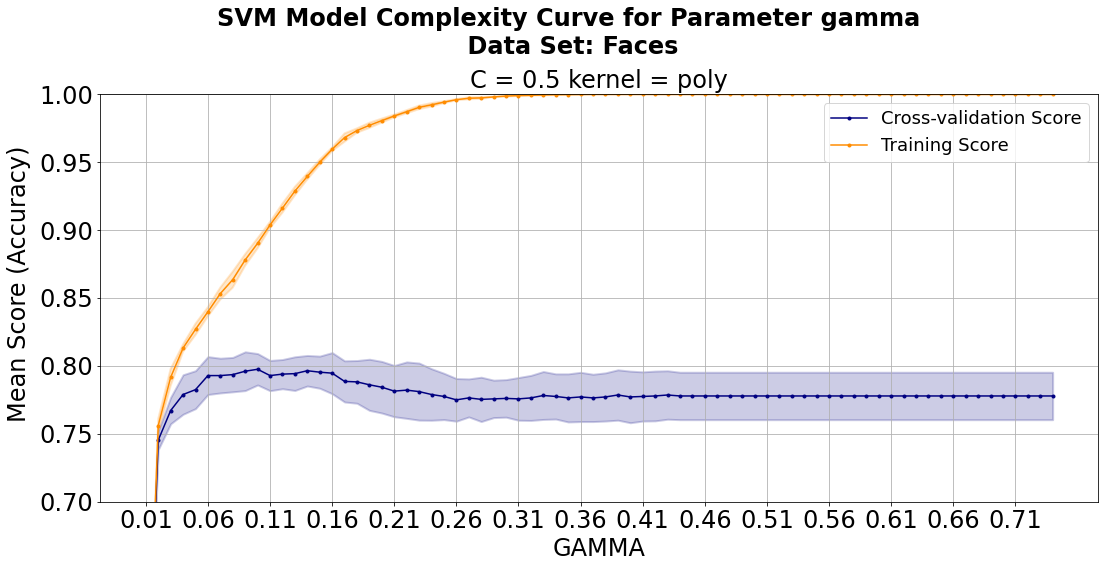

In [10]:
unused_params_values['kernel'] = 'linear'
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values, tick_spacing=3, ylim=ylim)
unused_params_values['kernel'] = 'poly'

poly_params = unused_params_values.copy()
poly_params['gamma']=gamma[5]
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'C', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=poly_params, tick_spacing=3, ylim=[0.7, 1.05])
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'gamma', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=poly_params, tick_spacing=5
                                                                     , ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.0s finished


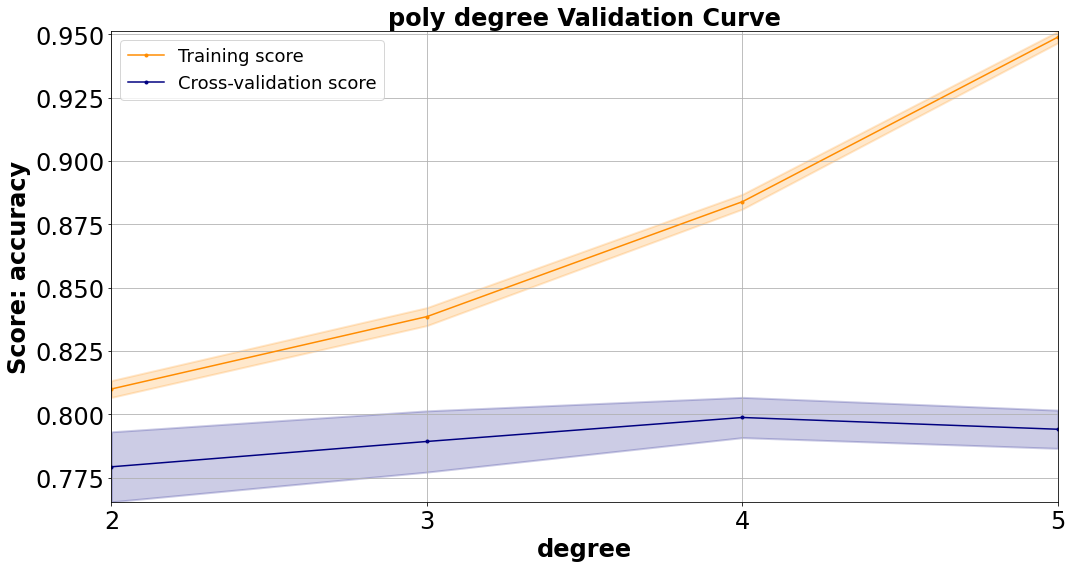

In [11]:
degree=[2,3,4,5]
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(**poly_params), X_train, y_train, "degree", degree, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "degree", degree, title="poly degree Validation Curve", scoring="accuracy", tick_spacing=1)

Plot saved as:  Figures/Faces_SVM_GridScore_C_gamma_0.png


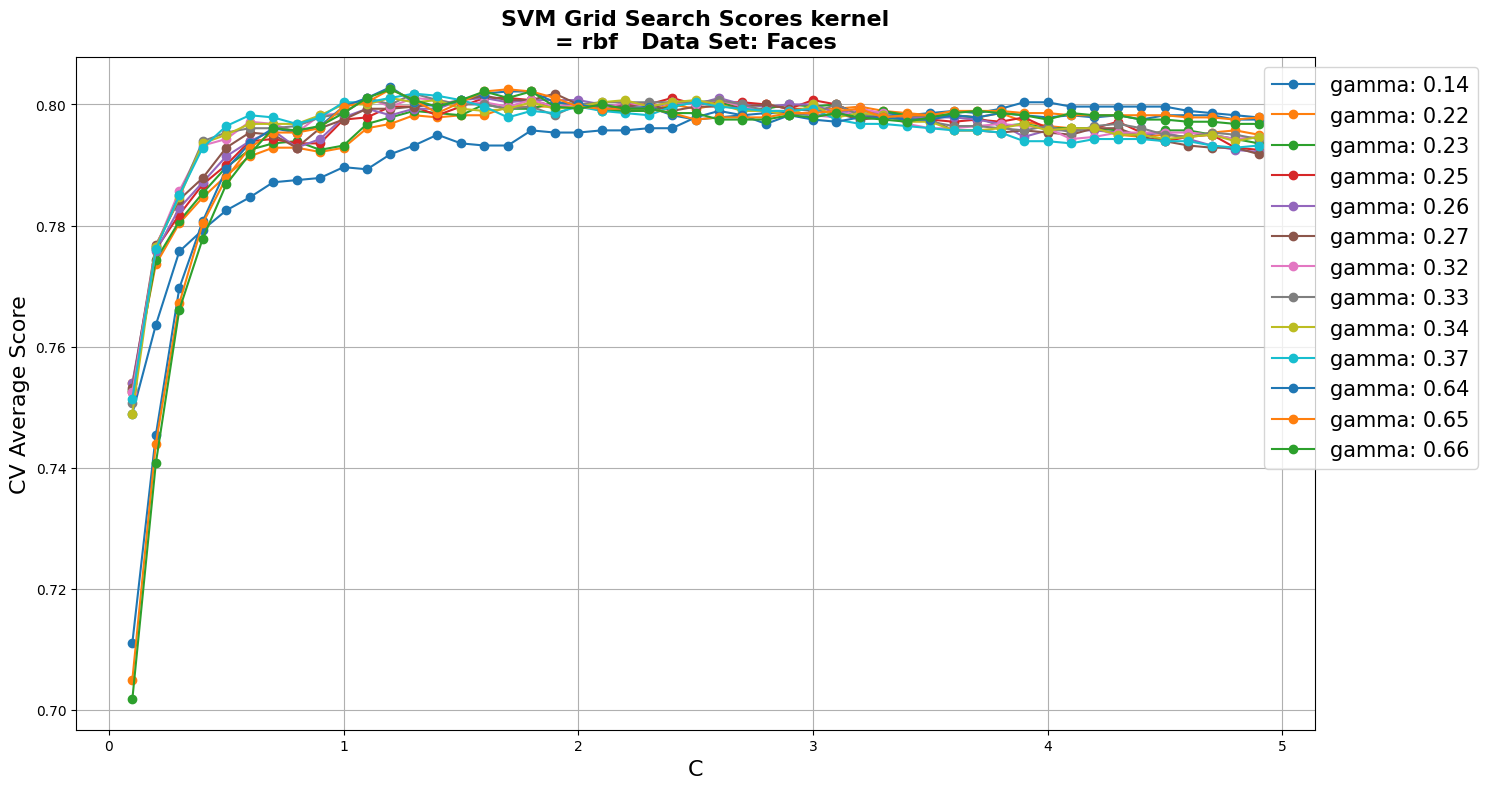

In [12]:
mean_score_limit=0.7975
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/Faces_SVM_GridScore_kernel_C_1.png


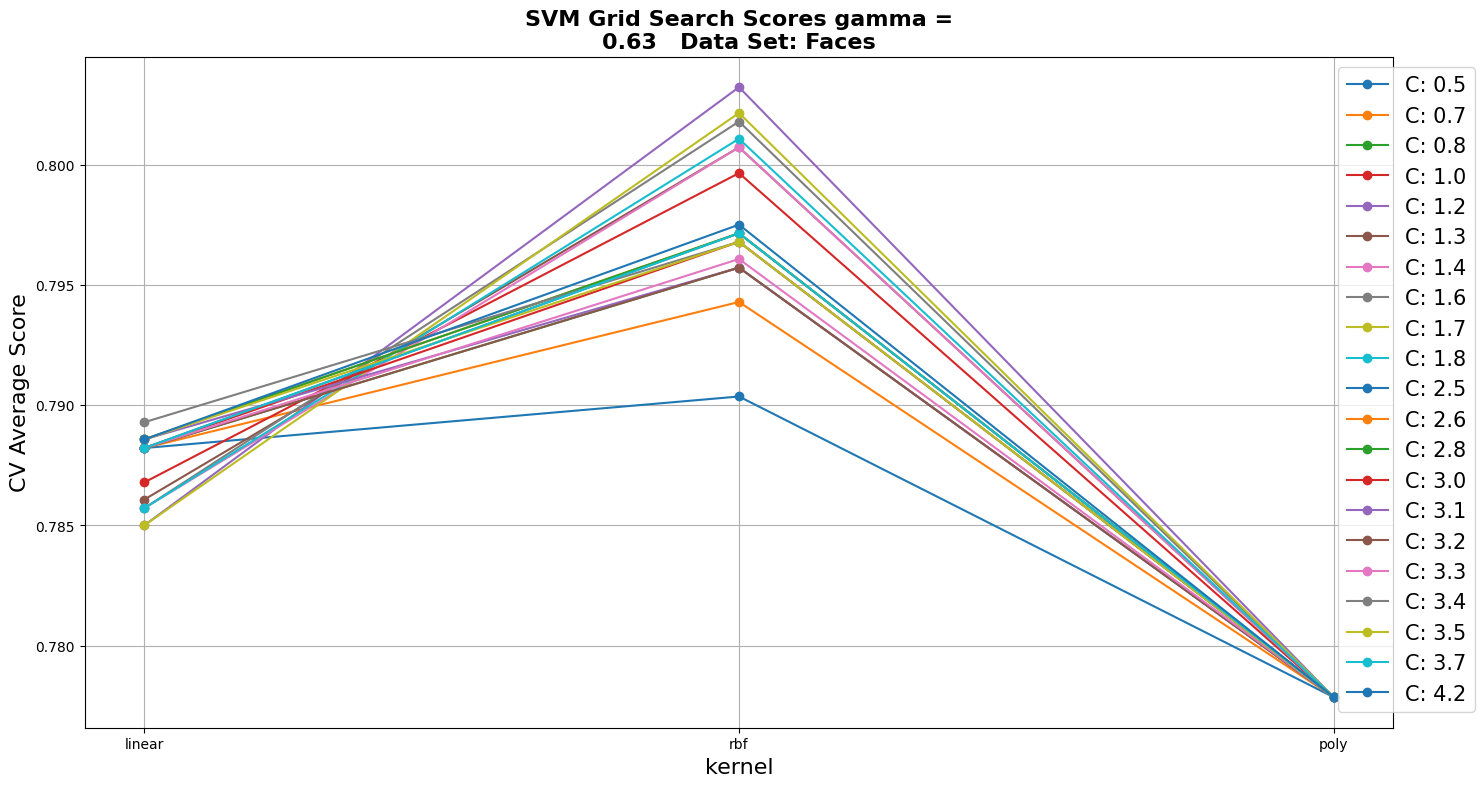

In [13]:
mean_score_limit=0.788
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'C', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/Faces_SVM_GridScore_kernel_gamma_2.png


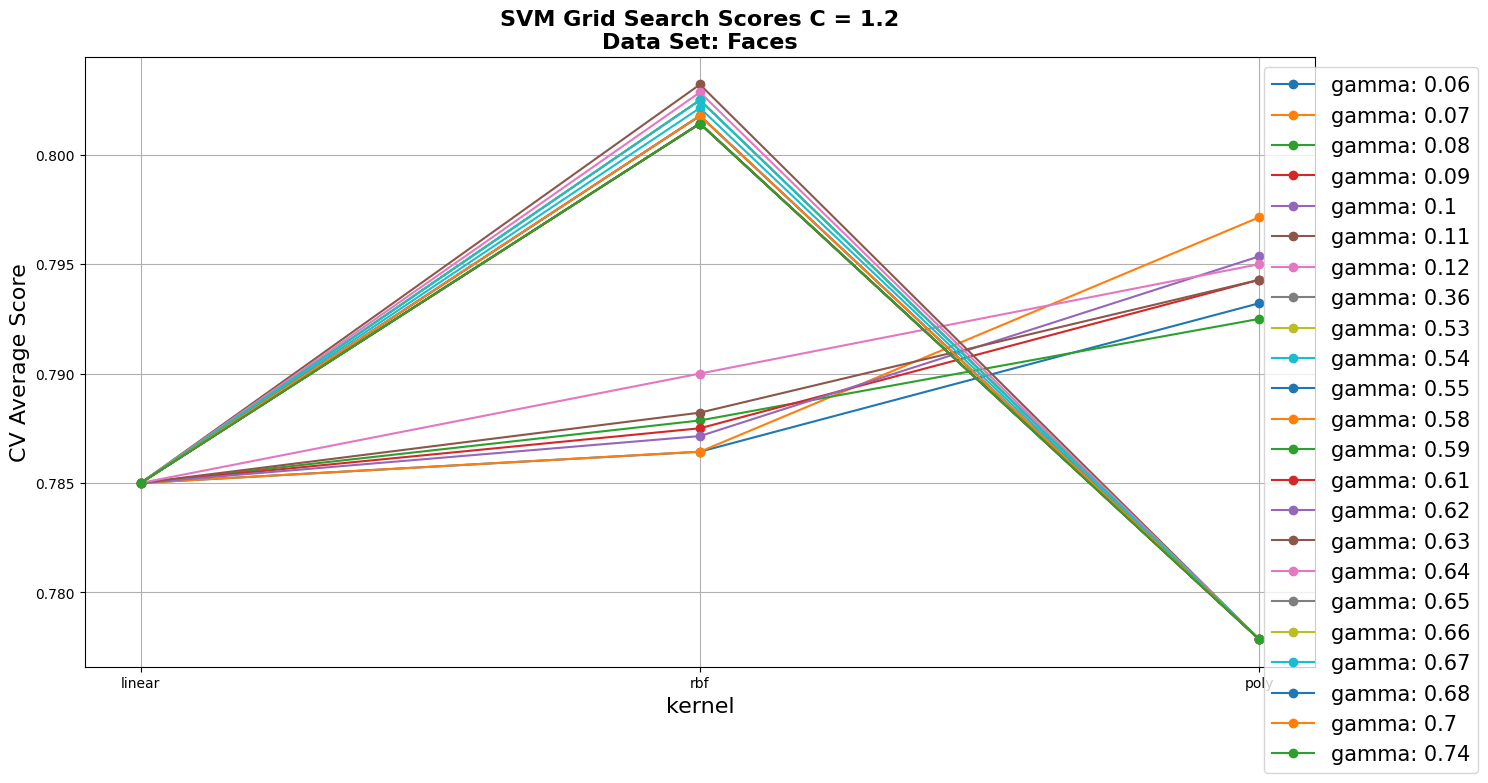

In [14]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'gamma', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

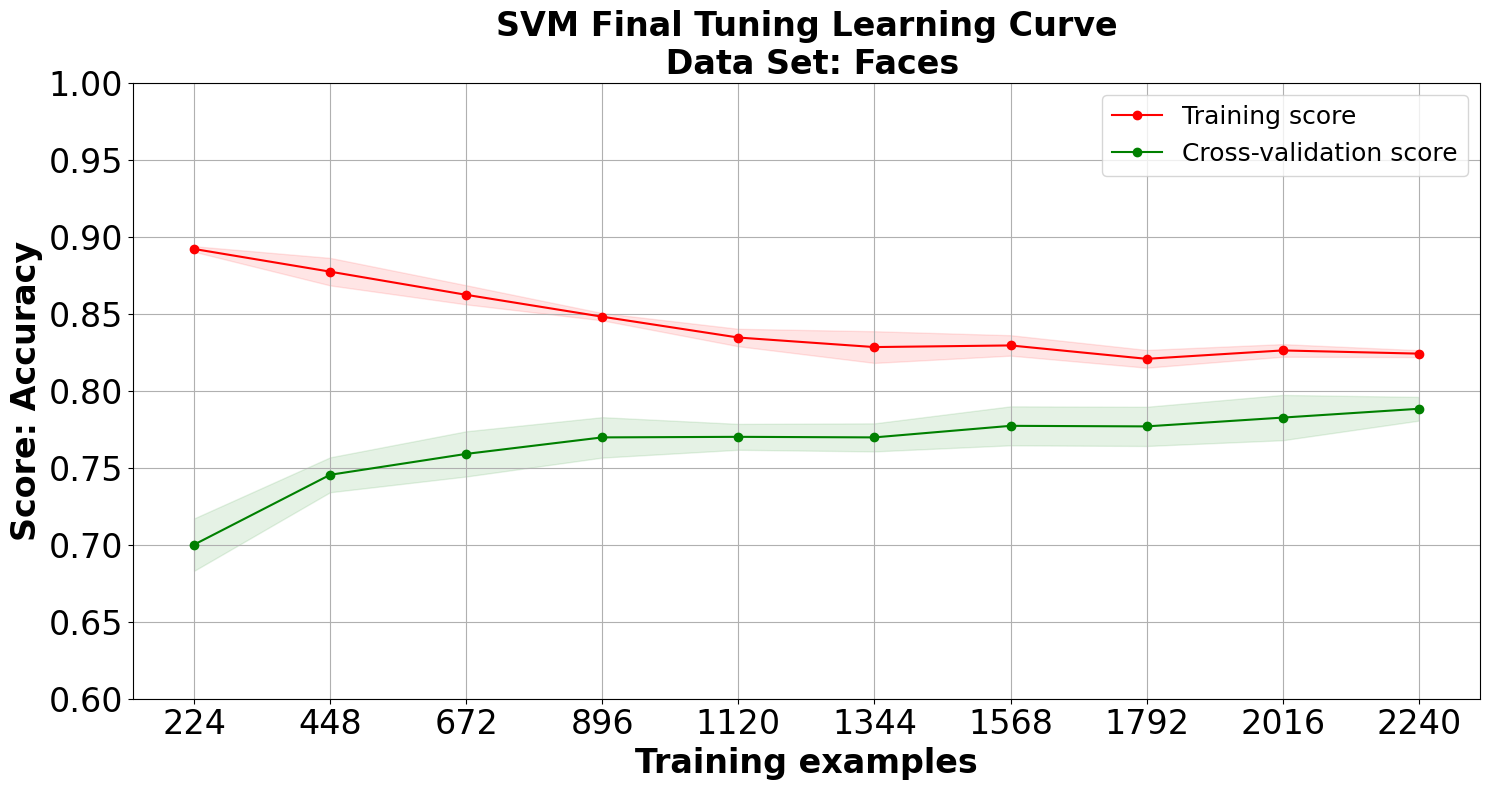

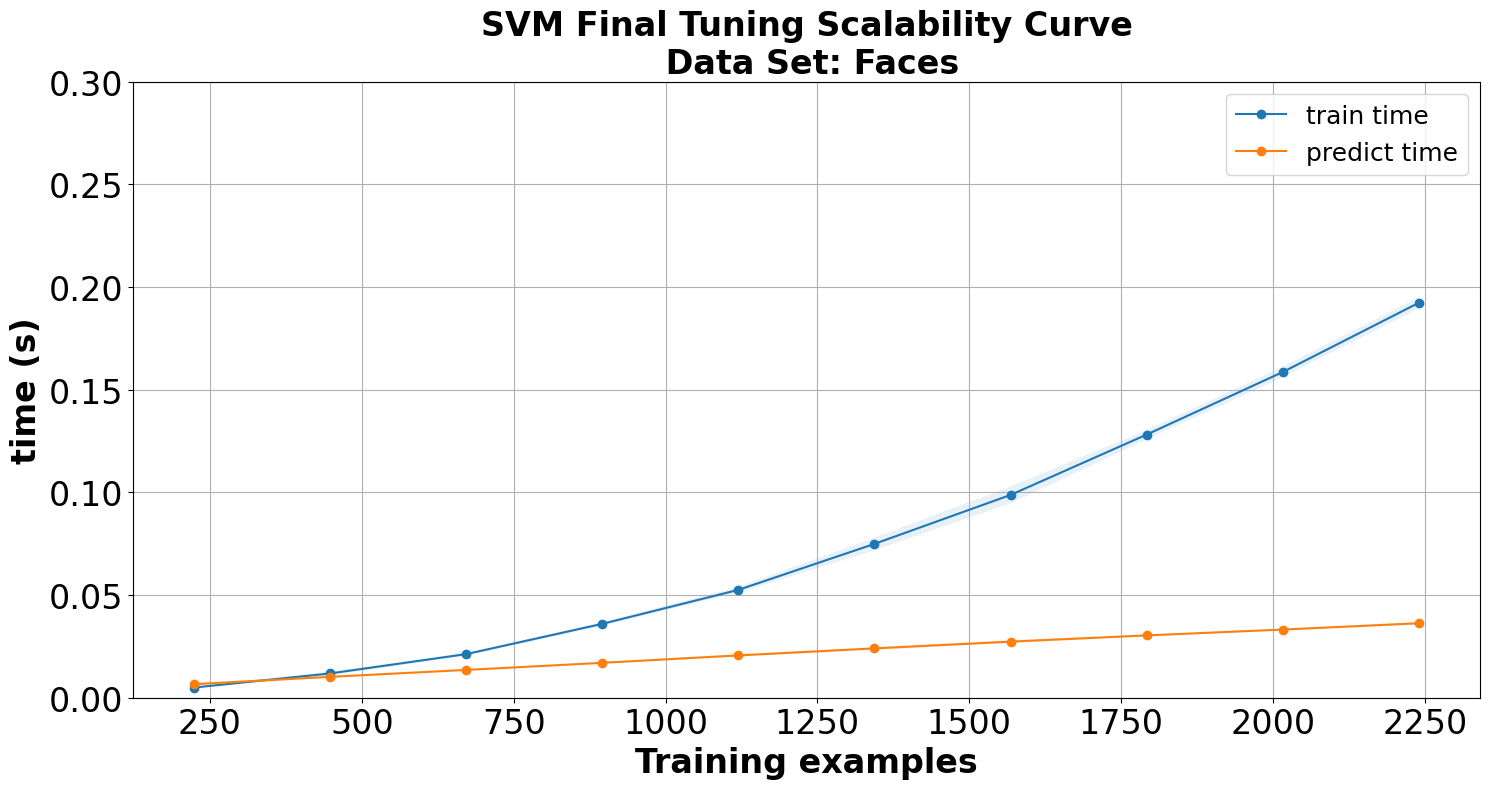

In [18]:
final_params={'kernel': 'linear', 'gamma':0.12, 'C':0.5}

train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(svm.SVC(**final_params), X_train, y_train, "accuracy")
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=learning_ylim)
TrainingCurves.plot_scalability_curve(fit_times, score_times, train_sizes, final_title.replace("Learning", "Scalability"), ylim=time_ylim)

In [19]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))

Default Fit Time: 0.388 seconds
Default Predict Time 0.064 seconds

Final Fit Time: 0.192 seconds
Final Predict Time: 0.036 seconds


In [20]:
unused_params_values = {'kernel': 'rbf', 'gamma':20, 'C':11}
clf = svm.SVC(**final_params)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))

Train Accuracy: 82.0%
Test Accuracy: 77.4%
